In [1]:
import pandas as pd
import numpy as np
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
#data wrangling
df = pd.read_csv('DailyDelhiClimateTest.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [3]:
## this problem is supervised learning problem
## and it is regression model problem

In [4]:
df.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [5]:
df.shape

(114, 5)

In [6]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [7]:
df.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [8]:
df=df[["date","meantemp"]]
df.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


In [9]:
df['date']= pd.to_datetime(df['date'])

In [10]:
df.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


data visualization


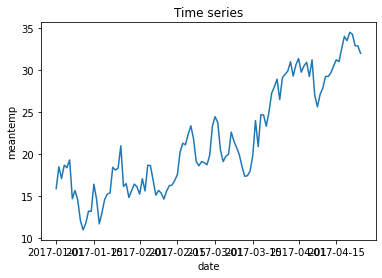

In [11]:
import matplotlib.pyplot as plt

plt.plot(df['date'],df['meantemp'])
plt.title('Time series')
plt.xlabel('date')
plt.ylabel('meantemp')
plt.show()

In [12]:
df["date"]

0     2017-01-01
1     2017-01-02
2     2017-01-03
3     2017-01-04
4     2017-01-05
         ...    
109   2017-04-20
110   2017-04-21
111   2017-04-22
112   2017-04-23
113   2017-04-24
Name: date, Length: 114, dtype: datetime64[ns]

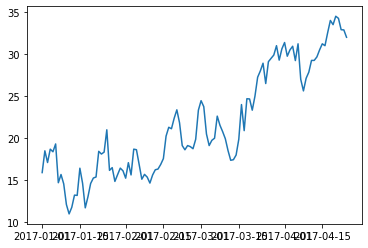

In [13]:
ts=df.groupby("date")["meantemp"].sum()
plt.plot(ts)

In [14]:
df["year"]=df["date"].dt.year
df.head()

,date,meantemp,year
0,2017-01-01,15.913043,2017
1,2017-01-02,18.500000,2017
2,2017-01-03,17.111111,2017
3,2017-01-04,18.700000,2017
4,2017-01-05,18.388889,2017


In [15]:
df["month"]= df["date"].dt.month
df.head()

,date,meantemp,year,month
0,2017-01-01,15.913043,2017,1
1,2017-01-02,18.500000,2017,1
2,2017-01-03,17.111111,2017,1
3,2017-01-04,18.700000,2017,1
4,2017-01-05,18.388889,2017,1


In [16]:
#product["Month"]= product["date"].dt.month

In [17]:
df["Week"]= df["date"].dt.week

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [18]:
df.head()

,date,meantemp,year,month,Week
0,2017-01-01,15.913043,2017,1,52
1,2017-01-02,18.500000,2017,1,1
2,2017-01-03,17.111111,2017,1,1
3,2017-01-04,18.700000,2017,1,1
4,2017-01-05,18.388889,2017,1,1


In [19]:
from statsmodels.tsa.holtwinters  import ExponentialSmoothing

In [20]:
# initialize the model
model=ExponentialSmoothing(endog=ts,trend="add")

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [21]:
model_fit=model.fit(optimized=True)

In [22]:
model_fit.forecast(steps=14)

2017-04-25    32.281763
2017-04-26    32.422717
2017-04-27    32.563671
2017-04-28    32.704625
2017-04-29    32.845579
2017-04-30    32.986532
2017-05-01    33.127486
2017-05-02    33.268440
2017-05-03    33.409394
2017-05-04    33.550348
2017-05-05    33.691302
2017-05-06    33.832256
2017-05-07    33.973210
2017-05-08    34.114164
Freq: D, dtype: float64

In [23]:
df.shape

(114, 5)

In [27]:
ts=df.groupby("date")["meantemp"].sum()

In [28]:
ts.head()

date
2017-01-01    15.913043
2017-01-02    18.500000
2017-01-03    17.111111
2017-01-04    18.700000
2017-01-05    18.388889
Name: meantemp, dtype: float64

In [41]:
model=ExponentialSmoothing(endog=ts,trend="add")

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [42]:
model_fit=model.fit(optimized=True)

In [43]:
#prediction
model_fit.forecast(steps=10)

2017-04-25    32.281763
2017-04-26    32.422717
2017-04-27    32.563671
2017-04-28    32.704625
2017-04-29    32.845579
2017-04-30    32.986532
2017-05-01    33.127486
2017-05-02    33.268440
2017-05-03    33.409394
2017-05-04    33.550348
Freq: D, dtype: float64

In [49]:
ts.tail(15)

date
2017-04-10    27.857143
2017-04-11    29.250000
2017-04-12    29.250000
2017-04-13    29.666667
2017-04-14    30.500000
2017-04-15    31.222222
2017-04-16    31.000000
2017-04-17    32.555556
2017-04-18    34.000000
2017-04-19    33.500000
2017-04-20    34.500000
2017-04-21    34.250000
2017-04-22    32.900000
2017-04-23    32.875000
2017-04-24    32.000000
Name: meantemp, dtype: float64

In [71]:
train_ts=ts[ts.index<"2017-04-15"]

In [72]:
train_ts.tail()

date
2017-04-10    27.857143
2017-04-11    29.250000
2017-04-12    29.250000
2017-04-13    29.666667
2017-04-14    30.500000
Name: meantemp, dtype: float64

In [73]:
train_ts.shape

(104,)

In [74]:
test_ts=ts[ts.index>= "2017-04-15"]

In [75]:
test_ts.shape

(10,)

In [76]:
model=ExponentialSmoothing(endog=train_ts,trend="add")

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [77]:
model_fit=model.fit(optimized=True)

In [78]:
train_ts.shape

(104,)

In [79]:
y_pred=model_fit.forecast(steps=10)

In [80]:
#error finding
from sklearn.metrics import mean_squared_error

In [81]:
mean_squared_error(y_true=test_ts,y_pred=y_pred)

4.144951392491569